## Download the Dataset from here
[Bird Migration](https://prod-edxapp.edx-cdn.org/assets/courseware/v1/c72498a54a4513c2eb4ec005adc0010c/asset-v1:HarvardX+PH526x+2T2018+type@asset+block/bird_tracking.csv)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# The code was removed by Watson Studio for sharing.

In [3]:
df = pd.read_csv(body)
df.head()

,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419859,2.120733,0.150000,Eric
1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric
2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric
3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric
4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric


In [4]:
df.count()

altitude              61920
date_time             61920
device_info_serial    61920
direction             61477
latitude              61920
longitude             61920
speed_2d              61477
bird_name             61920
dtype: int64

### Checking missing data in the dataset

In [5]:
missing_data = df.isnull()
missing_data.head()

,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False


In [6]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print('')

altitude
False    61920
Name: altitude, dtype: int64

date_time
False    61920
Name: date_time, dtype: int64

device_info_serial
False    61920
Name: device_info_serial, dtype: int64

direction
False    61477
True       443
Name: direction, dtype: int64

latitude
False    61920
Name: latitude, dtype: int64

longitude
False    61920
Name: longitude, dtype: int64

speed_2d
False    61477
True       443
Name: speed_2d, dtype: int64

bird_name
False    61920
Name: bird_name, dtype: int64



In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61920 entries, 0 to 61919
Data columns (total 8 columns):
altitude              61920 non-null int64
date_time             61920 non-null object
device_info_serial    61920 non-null int64
direction             61477 non-null float64
latitude              61920 non-null float64
longitude             61920 non-null float64
speed_2d              61477 non-null float64
bird_name             61920 non-null object
dtypes: float64(4), int64(2), object(2)
memory usage: 3.8+ MB


## Checking the flight pattern of all three birds by plotting their latitude and longitude on a 2D plane using matplotlib function

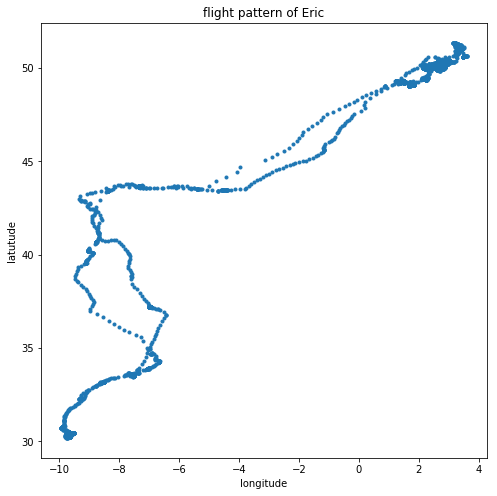

In [8]:
# Plotting the chart for bird eric

ix = (df.bird_name == 'Eric')
x,y = df.longitude[ix], df.latitude[ix]
# figure size of 8*8
plt.figure(figsize=(8,8))
plt.xlabel('longitude')
plt.ylabel('latutude')
plt.title('flight pattern of Eric')
plt.plot(x,y,'.')

### Finding trajectory for all the birds in the data list.

In [9]:
bird_names = pd.unique(df.bird_name)
bird_names

array(['Eric', 'Nico', 'Sanne'], dtype=object)

### Plotting the flight pattern for all the birds

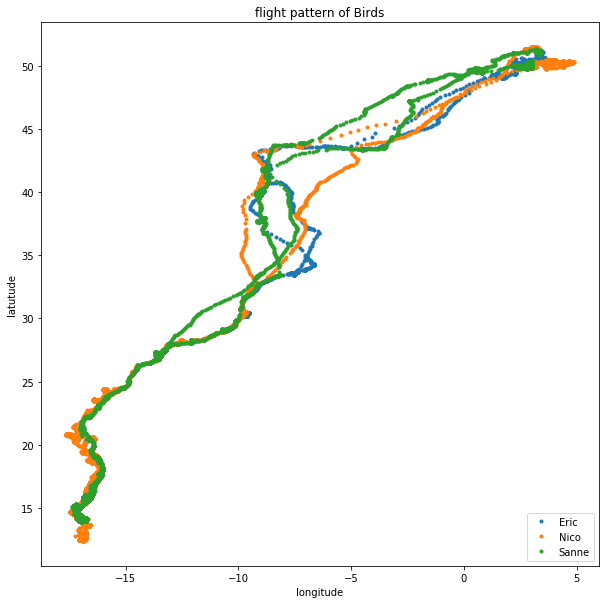

In [10]:
plt.figure(figsize=(10,10))
for bird_name in bird_names:
    ix = df.bird_name == bird_name
    x,y = df.longitude[ix], df.latitude[ix]
    plt.plot(x,y,'.', label = bird_name)
    
plt.xlabel('longitude')
plt.ylabel('latutude')
plt.title('flight pattern of Birds')
plt.legend(loc = 'lower right')
    


## Conclusion :
##### Nico and Sanne goes further south than the eric does !!

# Let's find out more about bird speed data by plotting the histogram!

In [11]:
ix = df.bird_name == 'Eric'
speed = df.speed_2d[ix]
# Since from the info , their are null values or Nan values in the speed array. 
np.isnan(speed).any()

True

In [12]:
# Finding total number of nan value for Eric speed data
np.sum(np.isnan(speed))

85

(array([  1.77320000e+04,   1.50200000e+03,   3.69000000e+02,
          7.80000000e+01,   1.20000000e+01,   7.00000000e+00,
          3.00000000e+00,   2.00000000e+00,   3.00000000e+00,
          2.00000000e+00]),
 array([  0.        ,   6.34880658,  12.69761316,  19.04641974,
         25.39522632,  31.7440329 ,  38.09283948,  44.44164607,
         50.79045265,  57.13925923,  63.48806581]),
 <a list of 10 Patch objects>)

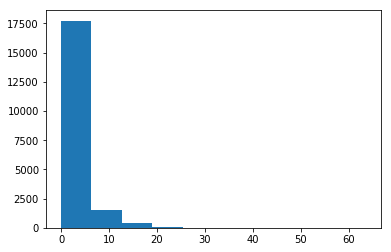

In [13]:
# Let's not consider these points while plotting the histogram
index = np.isnan(speed)
# for plotting histogram we only include those for which index is false. 
plt.hist(speed[~index])



Text(0.5,1,'Eric Speed ')

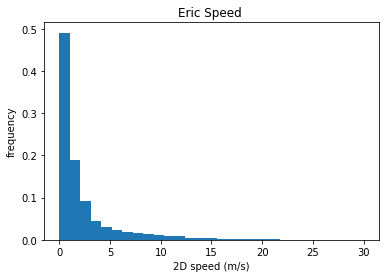

In [14]:
# to get a better picture of we will modify the histogram and add labels !
# from above figure , bin start at 0, ends at 30 with 20 partition, normed , means we are normalizing it. 
plt.hist(speed[~index], bins = np.linspace(0,30,30), normed = True)
plt.xlabel('2D speed (m/s)')
plt.ylabel('frequency')
plt.title('Eric Speed ')



In [15]:
import datetime
datetime.datetime.today()

datetime.datetime(2018, 11, 14, 7, 37, 35, 442422)

##  For working with map we will install cartopy library !!

### Importing necessary libruary!


In [16]:
!conda install -c conda-forge cartopy -y

Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /opt/conda/envs/DSX-Python35:

The following NEW packages will be INSTALLED:

    cartopy: 0.16.0-py35h81b52dc_2  conda-forge
    geos:    3.6.2-hfc679d8_3       conda-forge
    owslib:  0.17.0-py_0            conda-forge
    proj4:   4.9.3-h470a237_8       conda-forge
    pyepsg:  0.3.2-py_1             conda-forge
    pyproj:  1.9.5.1-py35h508ed2a_5 conda-forge
    pyshp:   2.0.0-py_0             conda-forge
    shapely: 1.6.4-py35h164cb2d_1   conda-forge

geos-3.6.2-hfc 100% |################################| Time: 0:00:00  11.55 MB/s
proj4-4.9.3-h4 100% |################################| Time: 0:00:00  46.34 MB/s
pyshp-2.0.0-py 100% |################################| Time: 0:00:00  30.63 MB/s
pyproj-1.9.5.1 100% |################################| Time: 0:00:00  48.83 MB/s
shapely-1.6.4- 100% |################################| Time: 0:00:00  62.06 MB/s
owslib-0.17.

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/physical/ne_110m_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/physical/ne_110m_ocean.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/physical/ne_110m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_boundary_lines_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)

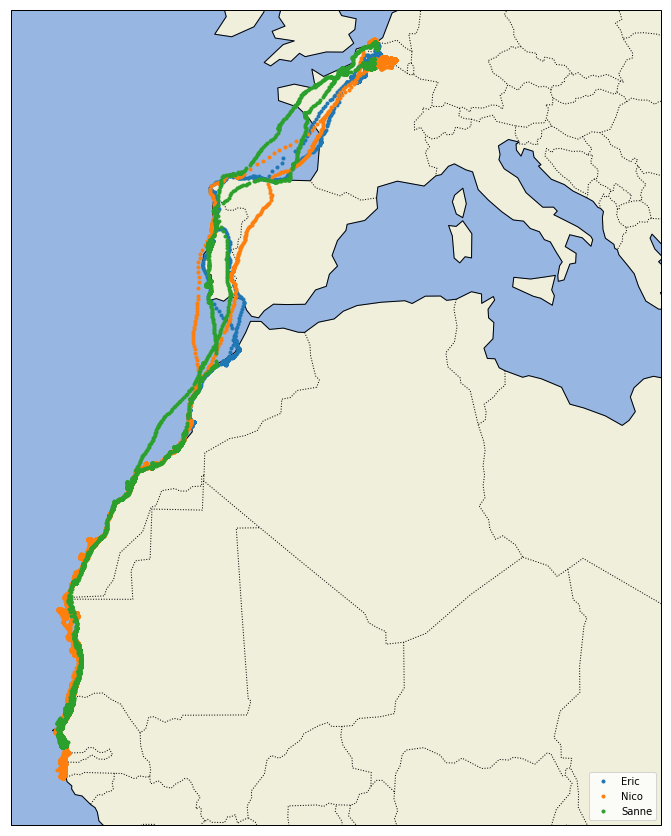

In [17]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

proj = ccrs.Mollweide()
plt.figure(figsize =(15,15))
ax = plt.axes(projection = proj)
ax.set_extent((-20.0,20.0,52.0,10.0))
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle = ':')
for name in bird_names:
    ix = df['bird_name'] == name
    x,y = df.longitude[ix],df.latitude[ix]
    ax.plot(x,y,'.', transform = ccrs.Geodetic(), label = name)
plt.legend(loc = "lower right")